# Deep regression of Boston housing price data
Try to build an appropriate deep regression model to predict Boston housing price.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import statsmodels.api as sm
from sklearn.datasets import load_boston
boston = load_boston()

Using TensorFlow backend.
C:\Users\burt\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def summary_model(history, model):
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')
    #print(val_loss[-1])
    plt.plot(range(len(loss)), loss, '-', label='Training')
    plt.plot(range(len(val_loss)), val_loss, '-', label='Validation')
    plt.ylim(0,80)
    plt.title('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    guess = model.predict(np.array(X_test)).reshape(1,-1)[0]
    loss = [(ele - ele2)**2 for ele, ele2 in zip(guess, Y_test)]
    #return(min(val_loss[-20:-1]))
    return(sum(loss))

### Data
設定$20%$為testing data，其餘$80%$為training data<br />
另外training時，epochs=3000，validation_split=0.2

In [3]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] = boston.target
X = bos.drop('price',axis  =  1)
Y = bos['price'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


### Model1 : Single hidden layer(300 units)

4501


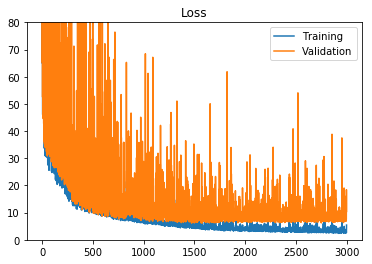

3119.9542505097702

In [21]:
# import random
np.random.seed(30)
#500
model1 = Sequential()
model1.add(Dense(units = 300, activation = 'relu', input_dim = 13))
model1.add(Dense(units = 1, activation = 'linear'))
model1.compile(loss = 'mean_squared_error', optimizer = 'nadam')
print(model1.count_params())
history1 = model1.fit(np.array(X_train), Y_train, epochs=3000,
                     verbose=0, validation_split=0.2)
loss1 = summary_model(history1, model1)
loss1

### Model2 : Two hidden layers(100 units + 30 units)

4461


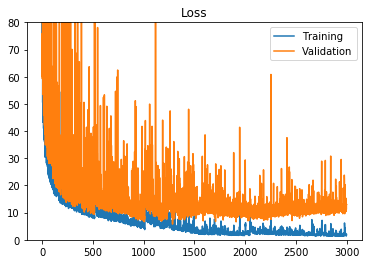

3391.5015927784261

In [5]:
model2 = Sequential()
model2.add(Dense(units = 100, activation = 'relu', input_dim = 13))
model2.add(Dense(units = 30, activation = 'relu'))
model2.add(Dense(units = 1, activation = 'linear'))
model2.compile(loss = 'mean_squared_error', optimizer = 'nadam')
print(model2.count_params())
history2 = model2.fit(np.array(X_train), Y_train, epochs=3000,
                      verbose=0, validation_split=0.2)
loss2 = summary_model(history2, model2)
loss2

### Model3 : Dimension reduction(13→5)

4451


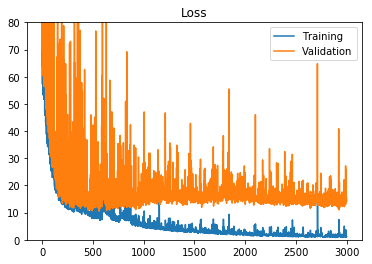

2935.7330488076882

In [6]:
model3 = Sequential()
model3.add(Dense(units = 5, activation = 'linear', input_dim = 13))
model3.add(Dense(units = 120, activation = 'relu'))
model3.add(Dense(units = 30, activation = 'relu'))
model3.add(Dense(units = 1, activation = 'linear'))
model3.compile(loss = 'mean_squared_error', optimizer = "nadam")
print(model3.count_params())
history3 = model3.fit(np.array(X_train), Y_train, epochs=3000,
                    verbose=0, validation_split=0.2)
loss3 = summary_model(history3, model3)
loss3

Note:A little overfitting 

### Model4 : $f(g(l(x)))$ ( $f$ 250 units + $g$ 130 units + $l$ 100 units)

4443


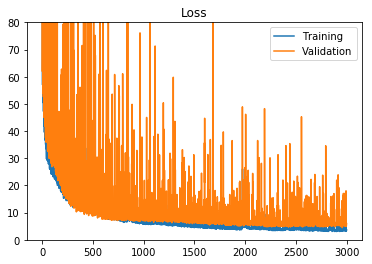

2770.611867485527

In [7]:
model4 = Sequential()
model4.add(Dense(units = 250, activation = 'relu', input_dim = 13))
model4.add(Dense(units = 1, activation = 'linear'))
model4.add(Dense(units = 130, activation = 'relu'))
model4.add(Dense(units = 1, activation = 'linear'))
model4.add(Dense(units = 100, activation = 'relu'))
model4.add(Dense(units = 1, activation = 'linear'))
model4.compile(loss = 'mean_squared_error', optimizer = "nadam")
print(model4.count_params())
history4 = model4.fit(np.array(X_train), Y_train, epochs=3000,
                      verbose=0, validation_split=0.2)
loss4 = summary_model(history4, model4)
loss4

### Summary

In [8]:
import pandas as pd
pd.DataFrame({"Par":[model1.count_params(),model2.count_params(),
                     model3.count_params(),model4.count_params()],
             "Sum of Square":[loss1,loss2,loss3,loss4],
             "Hidden":["300","100+30","5+120+30","250+1+150+1+100"],
             "Note":["Single hidden layer","Two hidden layers",
                     "Dim reduction(13→5) ","$f(g(l(x)))$"]}, 
             index = ["Model1","Model2","Model3","Model4"])

,Hidden,Note,Par,Sum of Square
Model1,300,Single hidden layer,4501,2501.698958
Model2,100+30,Two hidden layers,4461,3391.501593
Model3,5+120+30,Dim reduction(13→5),4451,2935.733049
Model4,250+1+150+1+100,$f(g(l(x)))$,4443,2770.611867


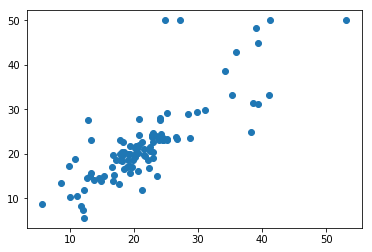

In [18]:
model=model3
guess = model.predict(np.array(X_test)).reshape(1,-1)[0]
plt.scatter(guess, Y_test)
plt.show()